     G1   G2  STIME  HEALTH  GENDER  FAILURES  ABSENCES   G3
0   8.9  9.0      6       1       1         0         0  9.1
1   9.3  9.7      5       1       1         0         3  9.2
2   8.7  8.5      5       0       0         0         4  7.9
3   7.9  8.5      7       1       0         0         1  8.5
4   8.0  6.1      2       1       1         1         4  7.0
5   8.1  8.5      5       1       1         0         2  8.6
6   6.8  7.0      3       1       0         1         4  7.1
7   9.1  8.7      4       0       1         0         3  8.0
8   8.0  8.1      3       1       1         0         4  8.1
9   6.3  7.5      2       1       1         2         5  7.1
10  9.1  9.0      5       1       0         0         0  9.2
     G1   G2   G3  STIME  HEALTH  GENDER  FAILURES  ABSENCES
1   9.3  9.7  9.2      5       1       1         0         3
6   6.8  7.0  7.1      3       1       0         1         4
10  9.1  9.0  9.2      5       1       0         0         0
0   8.9  9.0  9.1      6

C:\Users\vamsh\AppData\Local\Temp/ipykernel_17800/2483063654.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop([predict],1))


Accuracy: -28.503946553939407
Accuracy: 0.6445214345869666
Accuracy: 0.8795492957733502
Accuracy: 0.9586822644750262
Accuracy: -0.00979463121331614
Accuracy: 0.999666041802614
Accuracy: 0.3252779210685224
Accuracy: 0.6842881772007163
Accuracy: -0.5604244220653367
Accuracy: -0.5717779128655829
Accuracy: 0.7953322759656161
Accuracy: -0.5604244220653327
Accuracy: 0.9106696970656692
Accuracy: 0.8090493025741342
Accuracy: 0.8279309121575052
Accuracy: 0.2825189093580628
Accuracy: 0.8279309121575052
Accuracy: 0.9164590085614294
Accuracy: 0.8279309121575027
Accuracy: 0.516154174854479
Accuracy: -136.50019831452516
Accuracy: -49.67353648095923
Accuracy: 0.709031997456622
Accuracy: 0.982937194524143
Accuracy: -49.673536480959626
Accuracy: 0.8279309121575065
Accuracy: 0.7505486832203258
Accuracy: 0.516154174854479
Accuracy: 0.0
Accuracy: 0.36437393670617724
Accuracy: 0.7090319974566199
Accuracy: -3.7083017428069276
Accuracy: 0.0
Accuracy: 0.6842881772007194
Accuracy: 0.8924454316938654
Accuracy: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


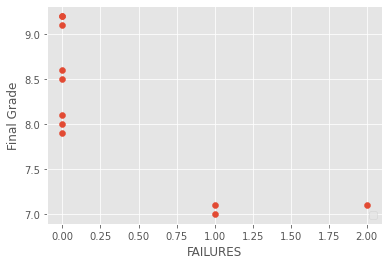

In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")
def trans_health(x):
    if x == 'WELL':
        return 1
    if x == 'NOT WELL':
        return 0
def trans_gender(n):
    if n == 'FEMALE':
        return 1
    if n == 'MALE':
        return 0
# Import dataset with student's data
data = pd.read_csv(r"D:\New folder\student-mat.csv")
data['GENDER']=data['GENDER'].apply(trans_gender)
data['HEALTH']=data['HEALTH'].apply(trans_health)
print(data)
# Select the value we want to predict
predict = "G3"


# List the variables we want to use for our predictions in this model
data = data[[ "G1", "G2", "G3", "STIME", "HEALTH", "GENDER", "FAILURES", "ABSENCES"]]
data = shuffle(data)
print(data)
x = np.array(data.drop([predict],1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

# Train model multiple times to find the highest accuracy
best = 0
for _ in range(200):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train,y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Highest Accuracy:", best)

# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predictions = linear.predict(x_test)

# Print the predictions, the variables we used and the actual final grade
for x in range(len(predictions)):
    print("Predicted Final grade:", predictions[x], "Data:", x_test[x], "Final grade:", y_test[x])

# Create visualisation of the model
plot = "FAILURES"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

In [20]:
#taking input from user
testcases=int(input("enter test cases:"))
for i in range(testcases):
    print("enter student details:")
    grade1=float(input("grade1:"))
    grade2=float(input("grade2:"))
    stime=float(input("stime:"))
    health=float(input("health:"))
    gender=float(input("gender:"))
    failures=float(input("failures:"))
    absences=float(input("absences:"))

    output=linear.predict([[grade1,grade2,stime,health,gender,failures,absences]])
    print("predicted output:",output)

enter test cases:2
enter student details:
grade1:6.8
grade2:7
stime:3
health:1
gender:0
failures:1
absences:4
predicted output: [7.17420575]
enter student details:
grade1:9.1
grade2:9
stime:5
health:1
gender:0
failures:0
absences:0
predicted output: [9.16270793]
